# [KDT] ch4 데이터 전처리

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.__version__

'1.4.4'

### 결측 값 (missing value)
* isna(), dropna(), fillna()
* 결측값 처리 방법
* 수작업으로 채워 넣음
* 특정값 사용
* 평균값 사용 (전체 평균 혹은 기준 속성 평균)
* 가장 가능성이 높은 값 사용 (회귀분석, 보간법 등)
* 해당 데이터 행을 모두 제거


In [2]:
# 파일 로딩
df_hk_na = pd.read_csv('c:ktd_2_data230224/hk_221206_na.csv')
df_hk_na.head()

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,NaN,NaN,A,A,NaN,1975
1,hkd10,900303-2,F,169.4,31.0,A,A,B,4720.0,2970
2,hkd100,681205-2,F,168.3,55.0,A,A,B,7280.0,5905
3,hkd101,931226-2,F,155.3,NaN,NaN,B,B,NaN,2935
4,hkd102,920123-1,M,188.6,NaN,NaN,B,F,NaN,4015


In [3]:
# 결측값 확인
df_hk_na.isna()

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,False,False,False,False,True,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,True,False
4,False,False,False,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False,False,False,False
247,False,False,False,False,False,False,False,False,False,False
248,False,False,False,False,True,True,False,False,True,False


In [4]:
# df_hk.info() info()로 확인가능
df_hk_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         250 non-null    object 
 1   jumin7       250 non-null    object 
 2   gender       250 non-null    object 
 3   height       250 non-null    float64
 4   age          234 non-null    float64
 5   blood_type   234 non-null    object 
 6   company      250 non-null    object 
 7   grades       250 non-null    object 
 8   salary       234 non-null    float64
 9   expenditure  250 non-null    int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 19.7+ KB


In [10]:
# df_hk['age'] 확인
df_hk_na[df_hk_na['age'].isna()]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,NaN,NaN,A,A,NaN,1975
3,hkd101,931226-2,F,155.3,NaN,NaN,B,B,NaN,2935
4,hkd102,920123-1,M,188.6,NaN,NaN,B,F,NaN,4015
6,hkd104,990623-1,M,176.0,NaN,NaN,B,A,NaN,2375
20,hkd117,860117-2,F,163.0,NaN,NaN,B,A,NaN,3355
29,hkd125,780112-2,F,169.1,NaN,NaN,B,A,NaN,4335
58,hkd151,781212-1,M,175.8,NaN,NaN,B,A,NaN,4755
59,hkd152,770202-1,M,176.8,NaN,NaN,B,A,NaN,4945
110,hkd199,820104-2,F,167.2,NaN,NaN,B,A,NaN,3785
170,hkd27,730716-1,M,171.7,NaN,NaN,A,B,NaN,6770


In [12]:
# 수작업으로 채워 넣음, 특정값 사용
df_hk_na['age'].fillna(df_hk_na['age'].mean())

0      39.337607
1      31.000000
2      55.000000
3      39.337607
4      39.337607
         ...    
245    50.000000
246    51.000000
247    52.000000
248    39.337607
249    54.000000
Name: age, Length: 250, dtype: float64

In [13]:
# 수작업으로 채워 넣음, 평균값 사용 (전체 평균 혹은 기준 속성 평균)
df_hk_na['age'].fillna(df_hk_na['age'].mean())

0      39.337607
1      31.000000
2      55.000000
3      39.337607
4      39.337607
         ...    
245    50.000000
246    51.000000
247    52.000000
248    39.337607
249    54.000000
Name: age, Length: 250, dtype: float64

In [15]:
# 해당 데이터 행을 모두 제거
df_hk_na.dropna(subset='age').isna().sum()

TypeError: Index(...) must be called with a collection of some kind, 'age' was passed

### 이상값(outlier)

* Turkey 방법 (IQR*1.5)


In [16]:
# 파일 로딩 
df_hk = pd.read_csv('c:ktd_2_data230224/hk_221206.csv')
df_hk[:2]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970


In [17]:
# EDA
df_hk.describe()

,height,age,salary,expenditure
count,250.000000,250.000000,250.000000,250.000000
mean,169.569200,39.240000,6357.480000,4971.480000
std,12.283857,8.653899,1849.791383,1861.112508
min,148.100000,20.000000,3080.000000,1330.000000
25%,159.300000,33.000000,5002.500000,3593.750000
50%,168.750000,39.000000,6100.000000,4762.500000
75%,180.375000,46.000000,7427.500000,6272.500000
max,191.800000,55.000000,11990.000000,10865.000000


In [22]:
# quantile
q1 = df_hk['expenditure'].quantile(0.25)
q3 = df_hk['expenditure'].quantile(0.75)

In [23]:
df_hk['expenditure'].quantile([0.25,0.5,0.75])

0.25    3593.75
0.50    4762.50
0.75    6272.50
Name: expenditure, dtype: float64

In [25]:
# quantile
IQR = q3 - q1
IQR

lo = q1 - IQR*1.5
hi = q3 + IQR*1.5

In [ ]:
# salary, expenditure 이상값 있음


In [ ]:
# salary, expenditure 이상값 있음


In [32]:
# salary, expenditure 이상값 추출
df_hk[(df_hk['expenditure'] < lo) | (df_hk['expenditure'] > hi)]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
161,hkd244,780116-2,F,151.4,43,O,C,C,11810,10685
162,hkd245,770205-2,F,165.0,44,A,C,B,11990,10865


In [33]:
# 삭제할 row index 추출
df_hk[(df_hk['expenditure'] < lo) | (df_hk['expenditure'] > hi)].index

Int64Index([161, 162], dtype='int64')

In [34]:
# drop(row index 사용)으로 삭제
df_hk.drop(df_hk[(df_hk['expenditure'] < lo) | (df_hk['expenditure'] > hi)].index)

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015
...,...,...,...,...,...,...,...,...,...,...
245,hkd95,730710-2,F,157.8,50,A,A,A,6990,4865
246,hkd96,720805-2,F,150.4,51,O,A,A,7110,4985
247,hkd97,710929-1,M,172.4,52,A,A,B,8000,6625
248,hkd98,701024-1,M,166.7,53,O,A,B,8760,7385


In [36]:
# 조건으로 삭제
df_hk[(df_hk['expenditure'] >= lo) & (df_hk['expenditure'] <= hi)]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015
...,...,...,...,...,...,...,...,...,...,...
245,hkd95,730710-2,F,157.8,50,A,A,A,6990,4865
246,hkd96,720805-2,F,150.4,51,O,A,A,7110,4985
247,hkd97,710929-1,M,172.4,52,A,A,B,8000,6625
248,hkd98,701024-1,M,166.7,53,O,A,B,8760,7385


### 결합 (join)
* merge - inner, left, right join

In [ ]:
# 파일 로딩 


In [ ]:
# merge 실습 파일 생성


In [ ]:
# merge  (inner join default)


In [ ]:
# merge   (left join)


In [ ]:
# merge   (right join)


In [ ]:
# merge   (outer join)


### Sampling
* Random sampling
* Stratified Random Sampling 
* Sytematic sampling
* Cluster sampling

In [ ]:
# 파일 로딩 


In [41]:
# Random sampling
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_hk, train_size=0.7, random_state=123)

In [42]:
df_train

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
193,hkd48,780113-1,M,184.0,43,AB,A,C,6530,5405
243,hkd93,730719-1,M,180.4,48,AB,A,B,7560,6185
152,hkd236,860621-1,M,166.2,35,A,C,B,10410,9285
184,hkd4,960809-1,M,177.6,25,O,A,B,4450,3075
190,hkd45,811022-1,M,182.1,40,B,A,C,5800,4675
...,...,...,...,...,...,...,...,...,...,...
98,hkd188,860617-2,F,164.1,35,O,B,B,4710,3335
220,hkd72,720803-1,M,183.2,51,B,A,A,8860,6735
66,hkd159,900303-1,M,170.1,31,B,B,B,3330,2205
126,hkd212,920124-2,F,158.3,29,O,C,C,6520,5770


In [46]:
# Sytematic sampling
df_index = df_hk.reset_index()
df_index

df_test = df_index[df_index['index'] % 5 == 0]
df_train = df_index[df_index['index'] % 5 != 0]
df_train

,index,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
1,1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015
6,6,hkd104,990623-1,M,176.0,22,A,B,A,3750,2375
...,...,...,...,...,...,...,...,...,...,...,...
244,244,hkd94,720614-1,M,174.1,49,O,A,B,8540,7165
246,246,hkd96,720805-2,F,150.4,51,O,A,A,7110,4985
247,247,hkd97,710929-1,M,172.4,52,A,A,B,8000,6625
248,248,hkd98,701024-1,M,166.7,53,O,A,B,8760,7385


In [47]:
# Cluster sampling
df_Cluster =df_hk[df_hk['company']=='A']
df_Cluster

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
12,hkd11,890419-1,M,188.2,32,B,A,B,4820,3070
23,hkd12,881109-2,F,170.2,33,AB,A,A,5080,2955
...,...,...,...,...,...,...,...,...,...,...
245,hkd95,730710-2,F,157.8,50,A,A,A,6990,4865
246,hkd96,720805-2,F,150.4,51,O,A,A,7110,4985
247,hkd97,710929-1,M,172.4,52,A,A,B,8000,6625
248,hkd98,701024-1,M,166.7,53,O,A,B,8760,7385


In [ ]:
# Stratified Random Sampling
df_hk['company'].value_counts()
pd.crosstab(df_Cluster)

### Normalization
* min_max scaling (최소-최대 변환)
* standard scaling (Z-score 변환)

In [ ]:
# 파일 로딩 


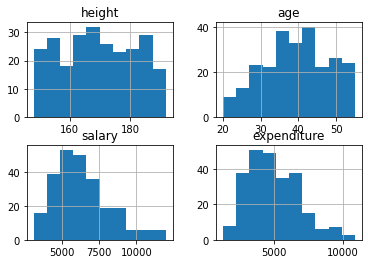

In [49]:
# histogram 확인
df_hk.hist()
plt.show()

<AxesSubplot:ylabel='Count'>

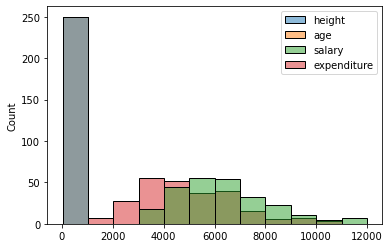

In [52]:
# histogram 확인
sns.histplot(df_hk[['height','age','salary','expenditure']])

In [59]:
# min_max scaling (최소-최대 변환)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
model = MinMaxScaler().fit(df_hk[['height','age','salary','expenditure']])
minmax = model.transform(df_hk[['height','age','salary','expenditure']])
df_hk_minmax = pd.DataFrame(minmax,columns=['height','age','salary','expenditure'])
df_hk_minmax

,height,age,salary,expenditure
0,0.315789,0.057143,0.114478,0.067646
1,0.487414,0.314286,0.184063,0.171998
2,0.462243,1.000000,0.471380,0.479811
3,0.164760,0.228571,0.109989,0.168327
4,0.926773,0.257143,0.147026,0.281594
...,...,...,...,...
245,0.221968,0.857143,0.438833,0.370739
246,0.052632,0.885714,0.452301,0.383325
247,0.556064,0.914286,0.552189,0.555322
248,0.425629,0.942857,0.637486,0.635029


In [62]:
# standard scaling (Z-score 변환)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
model = StandardScaler().fit(df_hk[['height','age','salary','expenditure']])
standard = model.transform(df_hk[['height','age','salary','expenditure']])
df_hk_standard = pd.DataFrame(standard,columns=['height','age','salary','expenditure'])
df_hk_standard

,height,age,salary,expenditure
0,-0.625584,-1.996162,-1.222845,-1.613278
1,-0.013802,-0.954082,-0.887000,-1.077579
2,-0.103530,1.824798,0.499716,0.502599
3,-1.163952,-1.301442,-1.244513,-1.096422
4,1.552361,-1.185655,-1.065756,-0.514960
...,...,...,...,...
245,-0.960025,1.245864,0.342627,-0.057328
246,-1.563650,1.361651,0.407630,0.007279
247,0.230911,1.477438,0.889730,0.890240
248,-0.234043,1.593224,1.301411,1.299417


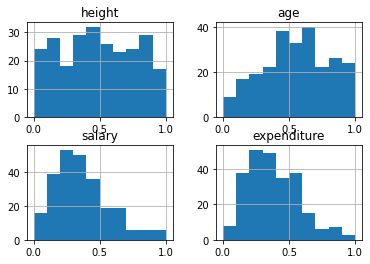

In [61]:
# histogram 확인
df_hk_minmax.hist()
plt.show()

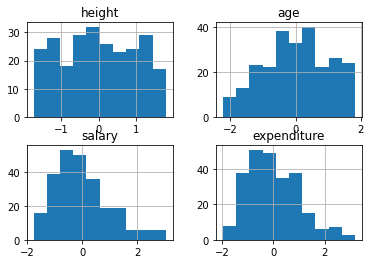

In [63]:
# histogram 확인
df_hk_standard.hist()
plt.show()

In [100]:
movie3 = pd.read_csv('c:ktd_2_data230224/DS_Sample_3.csv')
movie3

,Title,AirDate,Rating,Num_Votes,DirectedBy
0,Pilot,2005-03-24,7.5,4349,Ken Kwapis
1,Diversity Day,2005-03-29,8.3,4213,Ken Kwapis
2,Health Care,2005-04-05,7.8,3536,Ken Whittingham
3,The Alliance,2005-04-12,8.1,3428,Bryan Gordon
4,Basketball,2005-04-19,8.4,3745,Greg Daniels
...,...,...,...,...,...
183,Stairmageddon,2013-04-11,8.0,1743,Matt Sohn
184,Paper Airplane,2013-04-25,8.0,1748,Jesse Peretz
185,Livin' the Dream,2013-05-02,9.0,2439,Jeffrey Blitz
186,A.A.R.M.,2013-05-09,9.5,3401,David Rogers


In [102]:
movie3['group'] = pd.cut(movie3['AirDate'].str[0:4].astype('int'), bins=[2000,2007,2010,2013],labels=['a','b','c'])
movie3

,Title,AirDate,Rating,Num_Votes,DirectedBy,group
0,Pilot,2005-03-24,7.5,4349,Ken Kwapis,a
1,Diversity Day,2005-03-29,8.3,4213,Ken Kwapis,a
2,Health Care,2005-04-05,7.8,3536,Ken Whittingham,a
3,The Alliance,2005-04-12,8.1,3428,Bryan Gordon,a
4,Basketball,2005-04-19,8.4,3745,Greg Daniels,a
...,...,...,...,...,...,...
183,Stairmageddon,2013-04-11,8.0,1743,Matt Sohn,c
184,Paper Airplane,2013-04-25,8.0,1748,Jesse Peretz,c
185,Livin' the Dream,2013-05-02,9.0,2439,Jeffrey Blitz,c
186,A.A.R.M.,2013-05-09,9.5,3401,David Rogers,c


In [103]:
movie3['success'] = movie3['Rating'] * movie3['Num_Votes']
movie3

,Title,AirDate,Rating,Num_Votes,DirectedBy,group,success
0,Pilot,2005-03-24,7.5,4349,Ken Kwapis,a,32617.5
1,Diversity Day,2005-03-29,8.3,4213,Ken Kwapis,a,34967.9
2,Health Care,2005-04-05,7.8,3536,Ken Whittingham,a,27580.8
3,The Alliance,2005-04-12,8.1,3428,Bryan Gordon,a,27766.8
4,Basketball,2005-04-19,8.4,3745,Greg Daniels,a,31458.0
...,...,...,...,...,...,...,...
183,Stairmageddon,2013-04-11,8.0,1743,Matt Sohn,c,13944.0
184,Paper Airplane,2013-04-25,8.0,1748,Jesse Peretz,c,13984.0
185,Livin' the Dream,2013-05-02,9.0,2439,Jeffrey Blitz,c,21951.0
186,A.A.R.M.,2013-05-09,9.5,3401,David Rogers,c,32309.5


In [104]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [106]:
model = ols(formula='Num_Votes ~ group', data = movie3).fit()
anova_lm(movie3)

AttributeError: 'DataFrame' object has no attribute 'model'